## Data Science
### Módulo 2 _ Machine Learning
### Aprendizaje supervisado

# KNN (K-Nearest-Neighbor)
### `Skillsforindustry.org`


In [ ]:
# Importando librerías importantes
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl  # Importando matplotlib 
import matplotlib.pyplot as plt  
plt.style.use('seaborn') 
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##data_market = pd.read_excel('/content/Company_Data.xlsx', engine="openpyxl") #pip install openpyxl
data_market = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Company_Data.xlsx', engine= "openpyxl")

In [ ]:
data_market.head(10)

,Ticker,Name,Financial_Leverage,Gross_Margin,Sector
0,NWWTF US Equity,NEWNOTE FINANCIAL CORP,1.197160,238.383835,Technology
1,IMMR US Equity,IMMERSION CORPORATION,1.501849,99.537682,Technology
2,IBIN US Equity,IBSG INTERNATIONAL INC,1.497611,97.610268,Technology
3,MINI US Equity,MOBILE MINI INC,2.554593,97.368553,Industrials
4,TRTN US Equity,TRITON INTERNATIONAL LTD/BER,4.734284,96.007996,Industrials
5,VRRM US Equity,VERRA MOBILITY CORP,4.173229,95.858124,Technology
6,PBX CN Equity,POWERBAND SOLUTIONS INC,3.857037,93.906090,Technology
7,WSON33 BZ Equity,WILSON SONS LTD-BDR,2.289726,93.352707,Industrials
8,ZIMCF US Equity,ZIM CORP,1.216066,93.005119,Technology
9,MTLO CN Equity,MARTELLO TECHNOLOGIES GROUP,1.531599,92.768982,Technology


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_market.tail(10)

,Ticker,Name,Financial_Leverage,Gross_Margin,Sector
747,BUI CN Equity,BUHLER INDUSTRIES INC,2.540352,3.740709,Industrials
748,TSCC US Equity,TECHNOLOGY SOLUTIONS CO,1.148148,3.139420,Technology
749,SOX CN Equity,STUART OLSON INC,5.429112,2.886855,Industrials
750,GFL CN Equity,GFL ENVIRONMENTAL INC-SUB VT,3.925050,2.677078,Industrials
751,SIX CN Equity,HYDRO66 HOLDINGS CORP,1.562355,2.159563,Technology
752,PPSI US Equity,PIONEER POWER SOLUTIONS INC,2.198812,1.974378,Industrials
753,FLR US Equity,FLUOR CORP,4.285391,1.729458,Industrials
754,IVX CN Equity,INVENTRONICS LTD,5.137114,1.265823,Industrials
755,FTEK US Equity,FUEL TECH INC,1.233860,0.590391,Industrials
756,CNRD US Equity,CONRAD INDUSTRIES INC,1.365447,0.248727,Industrials


In [ ]:
data_market.shape

(757, 5)

In [ ]:
data_market.describe()

,Financial_Leverage,Gross_Margin
count,757.000000,757.000000
mean,5.297578,40.681015
std,35.489308,24.458288
min,1.000010,0.248727
25%,1.556211,22.031630
50%,2.250932,34.941868
75%,3.328835,56.458176
max,860.761353,238.383835


In [ ]:
data_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ticker              757 non-null    object 
 1   Name                757 non-null    object 
 2   Financial_Leverage  757 non-null    float64
 3   Gross_Margin        757 non-null    float64
 4   Sector              757 non-null    object 
dtypes: float64(2), object(3)
memory usage: 29.7+ KB


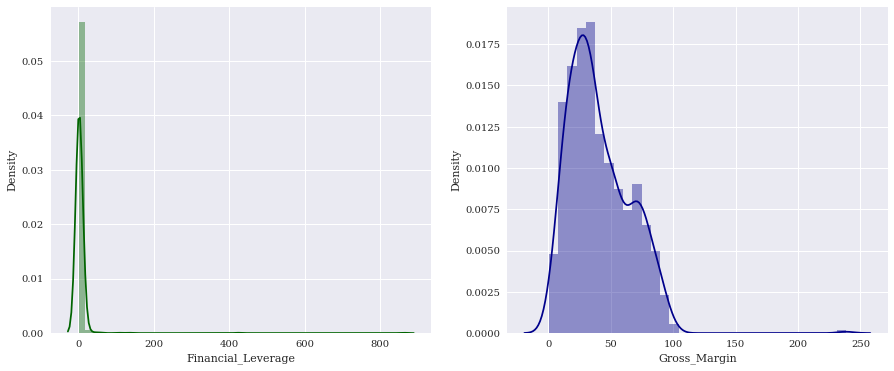

In [ ]:
f, axes = plt.subplots(ncols = 2, figsize = (15,6))

sns.distplot(data_market['Financial_Leverage'], kde = True, color= "darkgreen", ax=axes[0])

sns.distplot(data_market['Gross_Margin'], kde = True, color = "darkblue", ax=axes[1]);

In [ ]:
filter_data = data_market[(data_market['Financial_Leverage'] < 10) & (data_market['Gross_Margin'] < 80)] 

In [ ]:
filter_data.shape

(677, 5)

In [ ]:
filter_data.describe()

,Financial_Leverage,Gross_Margin
count,677.000000,677.000000
mean,2.689814,37.015972
std,1.670008,20.353657
min,1.000010,0.248727
25%,1.539783,21.115562
50%,2.196053,33.248943
75%,3.187492,51.785156
max,9.990330,79.968315


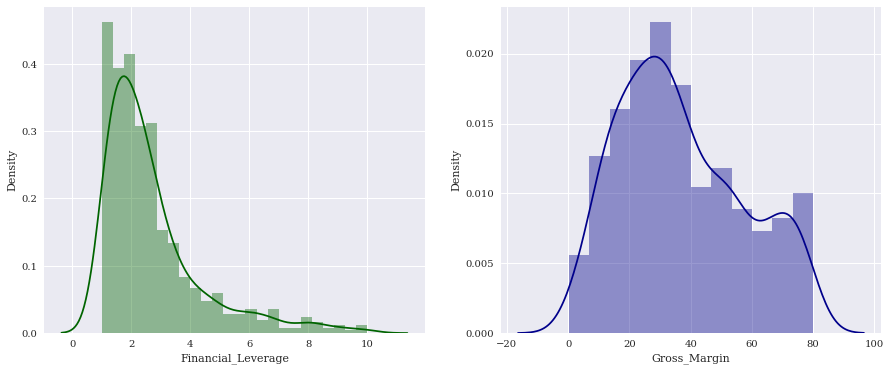

In [ ]:
f, axes = plt.subplots(ncols = 2, figsize = (15,6))

sns.distplot(filter_data['Financial_Leverage'], kde = True, color= "darkgreen", ax=axes[0])

sns.distplot(filter_data['Gross_Margin'], kde = True, color = "darkblue", ax=axes[1]);

In [ ]:
filter_data.keys()

Index(['Ticker', 'Name', 'Financial_Leverage', 'Gross_Margin', 'Sector'], dtype='object')

In [ ]:
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 52 to 756
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ticker              677 non-null    object 
 1   Name                677 non-null    object 
 2   Financial_Leverage  677 non-null    float64
 3   Gross_Margin        677 non-null    float64
 4   Sector              677 non-null    object 
dtypes: float64(2), object(3)
memory usage: 31.7+ KB


In [ ]:
filter_data['Sector'].value_counts()

Industrials    468
Technology     209
Name: Sector, dtype: int64

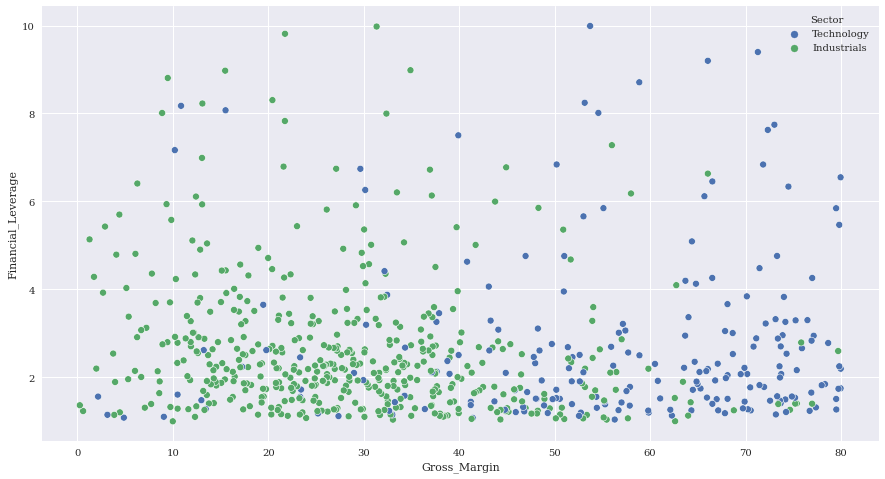

In [ ]:
f, ax = plt.subplots(figsize = (15,8))
sns.scatterplot(filter_data['Gross_Margin'],filter_data['Financial_Leverage'], hue= filter_data['Sector']);

In [ ]:
filter_data.keys()

Index(['Ticker', 'Name', 'Financial_Leverage', 'Gross_Margin', 'Sector'], dtype='object')

In [ ]:
filter_data['Sector_Code'] = filter_data['Sector'].astype('category').cat.codes # Preguntarle a ian para que funciona



#data["Complaint_Code"] = data["Complaint_Code"].astype('category').cat.codes

In [ ]:
filter_data.head(20)

,Ticker,Name,Financial_Leverage,Gross_Margin,Sector,Sector_Code
52,DT US Equity,DYNATRACE INC,2.196130,79.968315,Technology,1
53,INTU US Equity,INTUIT INC,1.750543,79.952827,Technology,1
54,ORCL US Equity,ORACLE CORP,6.548997,79.950996,Technology,1
55,SAIL US Equity,SAILPOINT TECHNOLOGIES HOLDI,2.251183,79.812134,Technology,1
56,MOBL US Equity,MOBILEIRON INC,5.467947,79.810677,Technology,1
57,QLYS US Equity,QUALYS INC,1.740421,79.728104,Technology,1
58,WSP CN Equity,WSP GLOBAL INC,2.598536,79.694923,Industrials,0
59,KICK US Equity,HPN HOLDINGS INC,1.268671,79.503105,Technology,1
60,ECOM US Equity,CHANNELADVISOR CORP,1.508526,79.491013,Technology,1
61,PS US Equity,PLURALSIGHT INC - A,5.845233,79.483192,Technology,1


In [ ]:
filter_data['Sector_Code'].value_counts()

0    468
1    209
Name: Sector_Code, dtype: int64

In [ ]:
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 52 to 756
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ticker              677 non-null    object 
 1   Name                677 non-null    object 
 2   Financial_Leverage  677 non-null    float64
 3   Gross_Margin        677 non-null    float64
 4   Sector              677 non-null    object 
 5   Sector_Code         677 non-null    int8   
dtypes: float64(2), int8(1), object(3)
memory usage: 32.4+ KB


In [ ]:
X = filter_data[['Financial_Leverage', 'Gross_Margin']]

In [ ]:
X.shape

(677, 2)

In [ ]:
X.head(8)

,Financial_Leverage,Gross_Margin
52,2.196130,79.968315
53,1.750543,79.952827
54,6.548997,79.950996
55,2.251183,79.812134
56,5.467947,79.810677
57,1.740421,79.728104
58,2.598536,79.694923
59,1.268671,79.503105


In [ ]:
y = filter_data['Sector_Code']

In [ ]:
y.shape

(677,)

In [ ]:
y.head(8)

52    1
53    1
54    1
55    1
56    1
57    1
58    0
59    1
Name: Sector_Code, dtype: int8

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 4)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,20)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

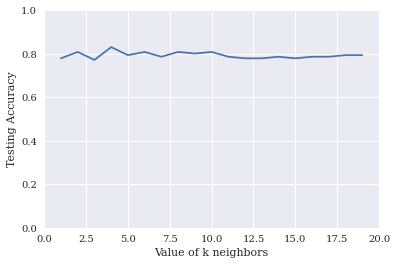

In [ ]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of k neighbors')
plt.xlim(0, 20)
plt.ylim(0,1)
plt.ylabel('Testing Accuracy');

In [ ]:
scores_list

[0.7794117647058824,
 0.8088235294117647,
 0.7720588235294118,
 0.8308823529411765,
 0.7941176470588235,
 0.8088235294117647,
 0.7867647058823529,
 0.8088235294117647,
 0.8014705882352942,
 0.8088235294117647,
 0.7867647058823529,
 0.7794117647058824,
 0.7794117647058824,
 0.7867647058823529,
 0.7794117647058824,
 0.7867647058823529,
 0.7867647058823529,
 0.7941176470588235,
 0.7941176470588235]

In [ ]:
max(scores_list)

0.8308823529411765

In [ ]:
scores_list.index(max(scores_list))

3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
classes = {0: 'Industrials', 1: 'Technology'}

In [ ]:
x_unseen = [[2,15], [1, 18], [3, 70]]

In [ ]:
y_predict = knn.predict(x_unseen)

In [ ]:
y_predict

array([0, 0, 1], dtype=int8)

In [ ]:
print(classes[y_predict[0]])
print(classes[y_predict[1]])
print(classes[y_predict[2]])

Industrials
Industrials
Technology
